In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import packages
import pandas as pd
from rdkit import Chem
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading data stored in CSV file into a pandas dataframe
data_df = pd.read_csv('/content/DataSet2.csv')

In [ ]:
data_df.drop(columns = ['Unnamed: 0'], inplace=True)

In [ ]:
columns = ['Tg', 'SMILES']
data_df.columns = columns

In [ ]:
data_df.head()

,Tg,SMILES
0,279.0,C=CC(=O)OCc1ccccc1
1,383.0,C=CC(=O)Oc2ccc(c1ccccc1)cc2
2,219.0,CCCCOC(=O)C=C
3,250.0,CC(OC(=O)C=C)CC
4,345.0,C=CC(=O)Oc1ccccc1C(C)(C)C


In [ ]:
# # choose 200 molecular descriptors
# chosen_descriptors = ['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed']

# # create molecular descriptor calculator
# mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)

# # use molecular descriptor calculator on RDKit mol object
# descriptors = []
# for smiles in data_df['SMILES']:
#   # print(smiles)
#   list_of_descriptor_vals = list(mol_descriptor_calculator.CalcDescriptors(smiles))
#   descriptors.append(list_of_descriptor_vals)  

# # convert the list of descriptors into pandas dataframe
# descriptors_df = pd.DataFrame(descriptors)

# # combine the original data with the Glass Transition Temperature attribute from data_df
# combined_data = pd.concat([descriptors_df, data_df['Tg']], axis=1)

In [ ]:
# Define a function to calculate all 208 molecular descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = {}
    flag = 0
    for descriptor_name, descriptor_function in Descriptors.descList:
        try:
            descriptor_value = descriptor_function(mol)
            descriptors[descriptor_name] = descriptor_value
        except:
            descriptors[descriptor_name] = None
            flag = 1
    if flag: print(mol)
    return descriptors


In [ ]:
# Calculate descriptors for each molecule
descriptors = []
for smiles in data_df['SMILES']:
    descriptor = calculate_descriptors(smiles)
    descriptors.append(descriptor)

# Convert the list of dictionaries to a Pandas DataFrame
descriptors_df = pd.DataFrame(descriptors)

# Combine the original data with the descriptors
combined_data = pd.concat([descriptors_df, data_df['Tg']], axis=1)

# # Save the combined data to a new CSV file
# combined_data.to_csv('all_descriptors.csv', index=False)

[02:59:17] Explicit valence for atom # 10 Cl, 3, is greater than permitted


None


[02:59:24] Can't kekulize mol.  Unkekulized atoms: 22 23 24 27 30 31 32


None


[02:59:34] Can't kekulize mol.  Unkekulized atoms: 25 26 27 28 29 36 37 40 41
[02:59:34] Can't kekulize mol.  Unkekulized atoms: 36 37 38 39 40 47 48 51 52
[02:59:34] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 27 34 35 38 39
[02:59:34] Can't kekulize mol.  Unkekulized atoms: 35 36 37 38 39 46 47 50 51
[02:59:34] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22 29 30 33 34


None
None
None
None
None


[02:59:34] Can't kekulize mol.  Unkekulized atoms: 30 31 32 33 34 41 42 45 46
[02:59:35] Can't kekulize mol.  Unkekulized atoms: 23 24 25 28 29 30 31 32 33
[02:59:35] Can't kekulize mol.  Unkekulized atoms: 22 23 24 27 28 29 30 31 32
[02:59:35] Can't kekulize mol.  Unkekulized atoms: 15 16 17 20 21 22 23 24 25


None
None
None
None


[02:59:36] Can't kekulize mol.  Unkekulized atoms: 21 22 23 26 27 28 29 30 31
[02:59:36] Can't kekulize mol.  Unkekulized atoms: 15 16 17 20 21 22 23 24 25
[02:59:36] Can't kekulize mol.  Unkekulized atoms: 16 17 18 21 22 23 24 25 26
[02:59:36] Can't kekulize mol.  Unkekulized atoms: 17 18 19 22 23 24 25 26 27


None
None
None
None


In [ ]:
combined_data.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Tg
0,10.644846,10.644846,0.311204,-0.389951,0.501002,162.188,152.108,162.06808,62.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279.0
1,10.995845,10.995845,0.446795,-0.446795,0.453217,224.259,212.163,224.08373,84.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,383.0
2,10.346346,10.346346,0.330139,-0.330139,0.325717,128.171,116.075,128.08373,52.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,219.0
3,10.440833,10.440833,0.009722,-0.343194,0.425150,128.171,116.075,128.08373,52.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0
4,11.120108,11.120108,0.043608,-0.424352,0.420172,204.269,188.141,204.11503,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.0


In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Columns: 210 entries, MaxAbsEStateIndex to Tg
dtypes: float64(210)
memory usage: 1.3 MB


In [ ]:
combined_data.describe()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Tg
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.0,...,794.000000,794.000000,794.0,794.0,794.0,794.0,794.000000,794.000000,794.0,809.000000
mean,11.886676,11.886676,0.175877,-0.899003,0.352730,426.581543,400.219931,426.240565,161.992443,0.0,...,0.001259,0.057935,0.0,0.0,0.0,0.0,0.002519,2.205290,0.0,406.960963
std,1.934731,1.934731,0.259116,1.602693,0.212797,236.035212,226.951968,235.851474,86.167817,0.0,...,0.035489,0.249426,0.0,0.0,0.0,0.0,0.050157,3.750668,0.0,105.776725
min,2.236111,2.236111,0.000118,-8.968038,0.035230,30.026000,28.010000,30.010565,12.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,178.000000
25%,11.422213,11.422213,0.043520,-0.842898,0.149618,240.262000,220.093500,240.089878,94.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,330.500000
50%,12.220858,12.220858,0.109558,-0.387644,0.347476,388.478000,360.287000,388.162185,150.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,398.500000
75%,12.936793,12.936793,0.203188,-0.242780,0.507903,576.187000,540.405000,575.732243,220.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,3.000000,0.0,490.500000
max,17.356242,17.356242,3.000000,3.000000,0.910055,1401.804000,1317.132000,1400.643109,526.000000,0.0,...,1.000000,2.000000,0.0,0.0,0.0,0.0,1.000000,28.000000,0.0,701.500000


In [ ]:
for column in combined_data.columns:
  print("For "+ column + ": " + f"{combined_data[column].isna().sum()}")

For MaxAbsEStateIndex: 15
For MaxEStateIndex: 15
For MinAbsEStateIndex: 15
For MinEStateIndex: 15
For qed: 15
For MolWt: 15
For HeavyAtomMolWt: 15
For ExactMolWt: 15
For NumValenceElectrons: 15
For NumRadicalElectrons: 15
For MaxPartialCharge: 18
For MinPartialCharge: 18
For MaxAbsPartialCharge: 18
For MinAbsPartialCharge: 18
For FpDensityMorgan1: 15
For FpDensityMorgan2: 15
For FpDensityMorgan3: 15
For BCUT2D_MWHI: 18
For BCUT2D_MWLOW: 18
For BCUT2D_CHGHI: 18
For BCUT2D_CHGLO: 18
For BCUT2D_LOGPHI: 18
For BCUT2D_LOGPLOW: 18
For BCUT2D_MRHI: 18
For BCUT2D_MRLOW: 18
For AvgIpc: 15
For BalabanJ: 15
For BertzCT: 15
For Chi0: 15
For Chi0n: 15
For Chi0v: 15
For Chi1: 15
For Chi1n: 15
For Chi1v: 15
For Chi2n: 15
For Chi2v: 15
For Chi3n: 15
For Chi3v: 15
For Chi4n: 15
For Chi4v: 15
For HallKierAlpha: 15
For Ipc: 15
For Kappa1: 15
For Kappa2: 15
For Kappa3: 15
For LabuteASA: 15
For PEOE_VSA1: 15
For PEOE_VSA10: 15
For PEOE_VSA11: 15
For PEOE_VSA12: 15
For PEOE_VSA13: 15
For PEOE_VSA14: 15
For 

We find that some of the molecules i.e. their SMILES representation as given in the data are unable to produce the rdkit descriptor values (NaN values) due to some invalidity in their SMILES data. Hence, we remove them from further analysis and take only the molecules which were able to produce all the descriptors.

In [ ]:
combined_data = combined_data.dropna() # final dataframe which has all the descriptors (features) and the glass transition temperature (dependent variable)

**Pearson correlation** - analysis 

In [ ]:
corr_matrix = combined_data.corr()

In [ ]:
print((abs(corr_matrix['Tg']) >= 0.65).sum()) # number of features with correlation >= 0.65 with Tg
print(corr_matrix['Tg'].sort_values(ascending=False))

12
Tg                        1.000000
RingCount                 0.725857
NumAromaticRings          0.714783
fr_benzene                0.698465
NumAromaticCarbocycles    0.698465
                            ...   
fr_term_acetylene              NaN
fr_tetrazole                   NaN
fr_thiazole                    NaN
fr_thiocyan                    NaN
fr_urea                        NaN
Name: Tg, Length: 210, dtype: float64


In [ ]:
# shortlisting features based on the correlation with 'Tg'
features_subset = [column for column in combined_data.columns if abs(corr_matrix['Tg'][column]) >= 0.65]

In [ ]:
subset_data = combined_data[features_subset]

In [ ]:
subset_data.head()

,BertzCT,HallKierAlpha,PEOE_VSA13,SMR_VSA10,SMR_VSA7,SlogP_VSA6,FractionCSP3,NumAromaticCarbocycles,NumAromaticRings,RingCount,fr_benzene,Tg
0,264.426885,-1.57,0.0,5.969305,48.550243,42.986791,0.100000,1.0,1.0,1.0,1.0,279.0
1,512.377900,-2.35,0.0,5.969305,67.252259,67.252259,0.000000,2.0,2.0,2.0,2.0,383.0
2,97.089273,-0.79,0.0,5.969305,12.654956,12.654956,0.571429,0.0,0.0,0.0,0.0,219.0
3,107.483778,-0.79,0.0,5.969305,12.654956,12.654956,0.571429,0.0,0.0,0.0,0.0,250.0
4,372.367497,-1.57,0.0,5.969305,42.483876,36.920424,0.307692,1.0,1.0,1.0,1.0,345.0


In [ ]:
# train test testation split
train_df, test_df = train_test_split(subset_data, test_size=0.1, random_state=42)

train_df, validation_df = train_test_split(train_df, test_size=0.1, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
validation_df.reset_index(drop=True, inplace=True)

x_train_df, y_train_df = train_df.drop('Tg', axis=1).copy(), train_df['Tg'].copy()
x_valid_df, y_valid_df = validation_df.drop('Tg', axis=1).copy(), validation_df['Tg'].copy()
x_test_df, y_test_df = test_df.drop('Tg', axis=1).copy(), test_df['Tg'].copy()

In [ ]:
# standard scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_df)
x_valid_scaled = scaler.fit_transform(x_valid_df)
x_test_scaled = scaler.fit_transform(x_test_df)

In [ ]:
y_test_df.head()

0    436.5
1    267.0
2    347.5
3    331.5
4    273.5
Name: Tg, dtype: float64

**Keras Model** - **Artificial Neural Network** - feed forward network

A feed forward model with 2 layers with 40 and 10 neurons respectively.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(40, activation="relu", input_shape=x_train_scaled.shape[1:]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="linear"),
])

In [ ]:
# Compile the model with Mean Squared Error (MSE) loss and Adam optimizer
model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.01))

# Fit the model with a batch size of 32
res = model.fit(x_train_scaled, y_train_df, epochs=400, validation_data=(x_valid_scaled, y_valid_df))

# Change the batch size to 64 and re-fit the model
# model.fit(x_train_scaled, y_train_df, batch_size=64, epochs=100, validation_data=(x_valid_scaled, y_valid_df))

Epoch 1/400
20/20 [==============================] - 1s 20ms/step - loss: 175515.2188 - val_loss: 174672.6250
Epoch 2/400
20/20 [==============================] - 0s 2ms/step - loss: 174588.8594 - val_loss: 173490.7500
Epoch 3/400
20/20 [==============================] - 0s 2ms/step - loss: 173139.8750 - val_loss: 171672.3438
Epoch 4/400
20/20 [==============================] - 0s 4ms/step - loss: 171022.0156 - val_loss: 168870.5469
Epoch 5/400
20/20 [==============================] - 0s 3ms/step - loss: 167804.0000 - val_loss: 164926.6875
Epoch 6/400
20/20 [==============================] - 0s 3ms/step - loss: 163408.9688 - val_loss: 159490.7656
Epoch 7/400
20/20 [==============================] - 0s 2ms/step - loss: 157496.8125 - val_loss: 152528.5000
Epoch 8/400
20/20 [==============================] - 0s 2ms/step - loss: 150066.9531 - val_loss: 143620.8438
Epoch 9/400
20/20 [==============================] - 0s 2ms/step - loss: 140717.0625 - val_loss: 133152.0312
Epoch 10/400
20/20

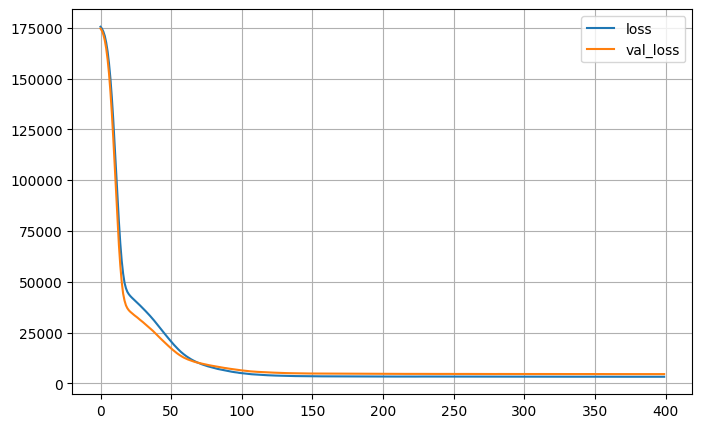

In [ ]:
pd.DataFrame(res.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
mse_test = model.evaluate(x_test_scaled, y_test_df)
x_new = x_test_scaled[:5] # pretend these are new instances
y_pred = model.predict(x_new)
# print(np.array(y_test_df[:3]))
print(f'Mean squared error in test data = {mse_test}')
print(f'Actual values: {np.array(y_test_df[:5])}; Predicted values: {y_pred.ravel()}')

1/1 [==============================] - 0s 66ms/step
Mean squared error in test data = 2991.498046875
Actual values: [436.5 267.  347.5 331.5 273.5]; Predicted values: [476.46927 303.88007 286.014   335.16125 297.6724 ]


**Standard deviation between predicted and actual values - test data**

In [ ]:
# Calculate the standard deviation between predicted and actual values - test data
y_test_pred = model.predict(x_test_scaled)
sd = np.std(y_test_pred - np.array(y_test_df))
print(f'Standard deviation between actual Tg and predicted Tg in test data = {sd}')

3/3 [==============================] - 0s 2ms/step
Standard deviation between actual Tg and predicted Tg in test data = 133.73276615147788


**Mean difference between predicted and actual values - test data**

In [ ]:
# Calculating mean difference between predicted and actual values - test data
mean_diff = np.sum(abs(np.subtract(np.array(y_test_pred).ravel(), np.array(y_test_df)))) / len(y_test_pred)
print(f'Mean difference between predicted and actual Tg values in test data = {mean_diff}')

Mean difference between predicted and actual Tg values in test data = 43.87295417785644


### Parity plot

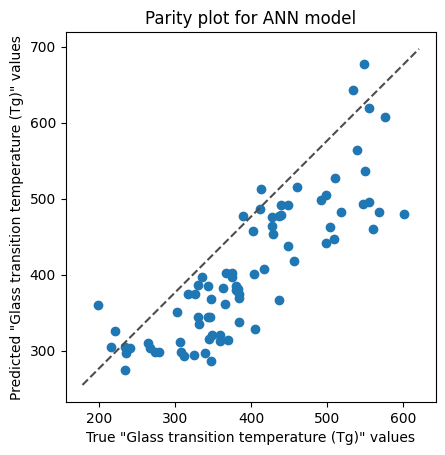

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test_df, y_test_pred)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--', c='.3')
ax.set_xlabel('True "Glass transition temperature (Tg)" values')
ax.set_ylabel('Predicted "Glass transition temperature (Tg)" values')
ax.set_title('Parity plot for ANN model')
ax.set_aspect("equal")
plt.show()